# Agglomeration priorization for UWWTD

## Get the data and give a preview of the decision matrix

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
#matplotlib as mpl

 
# get connected to the database
conn = pg.connect("dbname=prio_uwwtd_eu port=5432 user=postgres password=postgres")

#Load data from SQL DB
def load_matrix(cc, conn):
    dataframe = psql.read_sql("SELECT * FROM calcul.prio_agg_matrix_v3 WHERE cc = %(:cc)s", conn, params={":cc" : cc})
    #dataframe.set_index('aggcode', inplace = True)
    return dataframe



cc = 'cz' 
dataframe=load_matrix(cc, conn)
#Preview of the selected data matrix



In [10]:
dataframe.columns


Index(['cc', 'aggcode', 'aggname', 'typeofsensitivearea', 'sizecat',
       'generatedload_10th', 'generatedload_9th', 'generatedload_delta',
       'connectedload_10th', 'connectedload_9th', 'iasload_10th',
       'iasload_9th', 'dischargewithouttreatment_10th',
       'dischargewithouttreatment_9th', 'gp_10th', 'art3_10th', 'art4_10th',
       'art5_10th', 'art6_10th', 'dtt3_10th', 'dtt4t_10th', 'dtt4p_10th',
       'dtt5t_10th', 'dtt5p_10th', 'gp_9th', 'art3_9th', 'art4_9th',
       'art5_9th', 'art6_9th', 'dtt3_9th', 'dtt4t_9th', 'dtt4p_9th',
       'dtt5t_9th', 'dtt5p_9th', 'flagginv', 'flaggmeasures', 'nb_uwwtp',
       'nb_uwwtp_conn', 'nb_dcp', 'near_natura2000_uww_impacted',
       'near_natura2000_uww_impacted_intensity', 'wfd_ecologicalstatus',
       'wfd_chemicalstatus', 'wfd_uwwtd_status_point_p11',
       'wfd_uwwtd_status_point_p12', 'wfd_uwwtd_status_diffuse_p26',
       'spztype_catchmentOfSensitiveArea', 'spztype_coastalSensitiveArea',
       'spztype_lakeSensitiveAr

In [11]:
dataframe.tail(10)

,cc,aggcode,aggname,typeofsensitivearea,sizecat,generatedload_10th,generatedload_9th,generatedload_delta,connectedload_10th,connectedload_9th,...,spztype_riverSensitiveArea,spztype_transitionalSensitiveArea,spztype_freshwaterFishDesignatedWater,spztype_shellfishDesignatedWater,spztype_drinkingWaterProtectionArea,spztype_nitrateVulnerableZone,score,status,x,y
29,cz,CZAG598917,Karvina,SA,2,50907,56680,-5773,50907,56680.0,...,0,0,0,0,1,0,None,1,18.518400,49.847800
30,cz,CZAG598925,Albrechtice,SA,1,2189,4160,-1971,1620,3078.0,...,0,0,0,0,0,0,None,1,18.526900,49.786700
31,cz,CZAG598941,Detmarovice,SA,1,4200,6600,-2400,1512,2376.0,...,0,0,0,0,0,0,None,1,18.468400,49.888500
32,cz,CZAG599069,Orlova,SA,2,22344,30350,-8006,21003,28529.0,...,0,0,0,0,0,0,None,1,18.429700,49.843200
33,cz,CZAG599077,Petrovice u Karvine,SA,1,4821,5300,-479,1446,1590.0,...,0,0,0,0,1,0,None,1,18.540208,49.896948
34,cz,CZAG599107,Rychvald,SA,1,7093,7000,93,1844,1680.0,...,0,0,0,0,0,0,None,1,18.376734,49.866569
35,cz,CZAG599191,Novy Jicin,SA,2,27707,33770,-6063,21889,26678.0,...,0,0,0,0,0,0,None,1,18.010800,49.594800
36,cz,CZAG507971,Ludgerovice,SA,1,4862,4790,72,4862,4790.0,...,0,0,0,0,0,0,None,1,18.252200,49.880700
37,cz,CZAG509647,Pist,SA,1,2138,2150,-12,1775,1785.0,...,0,0,0,0,1,0,None,1,18.193300,49.978600
38,cz,CZAG539732,Stechovice,SA,1,2300,1600,700,1886,NaN,...,0,0,0,0,0,0,None,1,14.406500,49.851800


## Display chart of dataset distribution

Text(0.5, 1.0, 'Non compliant Agglomeration by category size  in cz')

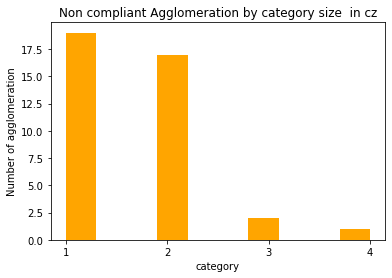

In [12]:
#print(dataframe.columns)

fig, ax = plt.subplots()
ax.hist(dataframe.sizecat, color='orange', align='mid', rwidth=1)
plt.xlabel('category')
plt.xticks([1, 2, 3, 4])
plt.ylabel('Number of agglomeration')
plt.title(f'Non compliant Agglomeration by category size  in {cc}')

#todo add a piechart


## Display a map of selected agglomeration

In [13]:
import folium
import numpy as np

lat_mean = np.mean(dataframe.y)
lon_mean = np.mean(dataframe.x)
print("Map center (lat, lon)", lat_mean, lon_mean)

map = folium.Map(tiles='OpenStreetMap', location=(lat_mean, lon_mean), zoom_start=7)

tooltip = 'Click me!'
year = 2016
for lat, lon, aggcode, aggname, generatedload in zip(dataframe.y, dataframe.x, dataframe.aggcode, dataframe.aggname, dataframe.generatedload_10th):
    #Add markers on map
    folium.Marker([lat, lon], 
                  popup=f'<b><a target="_blank" href="https://uwwtd.eu/Czech-Republic/agglomeration/{aggcode}/{year}">{aggname} [{aggcode}]</a></b><br/>\
                  <b>Generated load : </b>{generatedload} p.e.<br/>',
                  tooltip=tooltip).add_to(map)
folium.LayerControl().add_to(map)
map

Map center (lat, lon) 50.22062607435897 16.024642094871794


## Priorization 

### Criterion 1 – Size of the agglomeration

A rank using UWWTD information:
- Distance to target from 10th reporting:
    - Distance to target collection: score 3 if distance more than 2000pe and more than 1% of the generated load, score 2 if distance more than 2000pe and less than or equal 1% of the generated load, score 1 if distance less than 2000pe and score 0 if no distance,
    - Distance to target secondary: score 3 if distance more than 2000pe and more than 1% of the generated load, score 2 if distance more than 2000pe and less than or equal 1% of the generated load, score 1 if distance less than 2000pe and score 0 if no distance,
    - Distance to target more stringent: score 3 if distance more than 2000pe and more than 1% of the generated load, score 2 if distance more than 2000pe and less than or equal 1% of the generated load, score 1 if distance less than 2000pe and score 0 if no distance,
- A secondary “aggravation factor” if the distance to target from 9th reporting was the same or higher.



In [14]:
#Distance to target collection
# individual score
dtt_art3_score = []
dtt_art4_score = []
dtt_art5_score = []
dtt_art3_aggravation_score = []
dtt_art4_aggravation_score = []
dtt_art5_aggravation_score = []

# criterion 1 score
dtt_score = []

def get_ddt_score(val, genload):
    if val>0:
        rate = 100 * val/genload
        if val > 2000 and rate > 1 :
            return 3
        elif val > 2000 and rate <= 1 :
            return 2
        else:
            return 1 
    else:
        return 0

def get_dtt_aggravation(dtt, dtt_n1, genload) :
    score = get_ddt_score(dtt, genload)
    if dtt_n1 < dtt:
        return score
    else:
        return score + 1

#Distance to target from 10th reporting    
dataframe['dtt_art3_score'] = dataframe.apply(lambda row : get_ddt_score(row['dtt3_10th'], row['generatedload_10th']), axis = 1)     
dataframe['dtt_art4_score'] = dataframe.apply(lambda row : get_ddt_score(row['dtt4p_10th'], row['connectedload_10th']), axis = 1)     
dataframe['dtt_art5_score'] = dataframe.apply(lambda row : get_ddt_score(row['dtt5p_10th'], row['connectedload_10th']), axis = 1)     
   
# secondary “aggravation factor”
dataframe['dtt_art3_aggravation_score'] = dataframe.apply(lambda row : get_dtt_aggravation(row['dtt3_10th'], row['dtt3_9th'], row['generatedload_10th']), axis = 1) 
dataframe['dtt_art4_aggravation_score'] = dataframe.apply(lambda row : get_dtt_aggravation(row['dtt4p_10th'], row['dtt4p_9th'], row['connectedload_10th']), axis = 1)
dataframe['dtt_art5_aggravation_score'] = dataframe.apply(lambda row : get_dtt_aggravation(row['dtt5p_10th'], row['dtt5p_9th'], row['connectedload_10th']), axis = 1)

#criterion 1 score
dataframe['criterion_1_dtt_score'] = dataframe[['dtt_art3_aggravation_score','dtt_art4_aggravation_score','dtt_art5_aggravation_score']].sum(axis=1)
#dataframe['criterion_1_dtt_score'] = dataframe['dtt_art3_aggravation_score']*0.5 + dataframe['dtt_art4_aggravation_score']*0.3 + dataframe['dtt_art5_aggravation_score']*0.2

#'dtt_art3_aggravation_score','dtt_art4_aggravation_score','dtt_art5_aggravation_score'


Text(0.5, 1.0, 'Number of agglomeration by Criterion 1 score in cz')

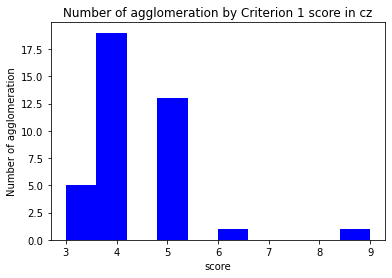

In [15]:
fig, ax = plt.subplots()
ax.hist(dataframe.criterion_1_dtt_score, color='blue', align='mid', rwidth=1)
plt.xlabel('score')
#plt.xticks([1, 2, 3, 4])
plt.ylabel('Number of agglomeration')
plt.title(f'Number of agglomeration by Criterion 1 score in {cc}')



Text(0.5, 1.0, 'Scatter of agglomeration by size and criterion 1 score in cz')

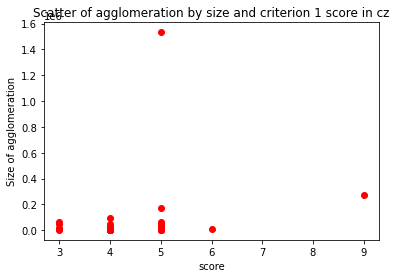

In [16]:
fig, ax = plt.subplots()
ax.scatter(y=dataframe.generatedload_10th , x=dataframe.criterion_1_dtt_score, c='red')
plt.xlabel('score')
#plt.xticks([1, 2, 3, 4])
plt.ylabel('Size of agglomeration')
plt.title(f'Scatter of agglomeration by size and criterion 1 score in {cc}')


## Criterion 2 – Environmental impact
A rank using proxies to environmental impact information:
- Proxies from WFD reporting:
    - Significant pressure on the receiving waterbody from P1-1 - Point - Urban waste water, P1-2 - Point - Storm overflows, P2-1 - Diffuse - Urban run-off,
    - Ecological status (>3) of receiving waterbody,
    - Receiving waterbody included in register of protected areas: Sensitive area, Bathing water, Drinking water, shellfish, nitrate vulnerable zone
- Proxy from Natura 2000, secondary “aggravation factor”:
    - Discharge point near a Natura 2000 area impacted by waste water, and impact intensity,


In [17]:
def filter_wfd_chemicalstatus(x):
    if x > 2:
        return x
    else:
        return 0


wfd_chemicalstatus = pd.to_numeric(dataframe['wfd_chemicalstatus'], errors='coerce')
np.nan_to_num(wfd_chemicalstatus, False)
#wfd_chemicalstatus = wfd_chemicalstatus[wfd_chemicalstatus>2]
#wfd_chemicalstatus = wfd_chemicalstatus.apply()
#np.nan_to_num(wfd_chemicalstatus, False)

wfd_chemicalstatus = wfd_chemicalstatus.apply(lambda row : filter_wfd_chemicalstatus(row))


In [18]:
def filter_wfd_ecologicalstatus(x):
    if x > 3:
        return x
    else:
        return 0

wfd_ecologicalstatus = pd.to_numeric(dataframe['wfd_ecologicalstatus'], errors='coerce')
#wfd_ecologicalstatus = wfd_ecologicalstatus[wfd_ecologicalstatus>3]
np.nan_to_num(wfd_ecologicalstatus, False)

wfd_ecologicalstatus = wfd_ecologicalstatus.apply(lambda row : filter_wfd_ecologicalstatus(row))


In [31]:
#Criterion 2
criterion_2_collect = dataframe['wfd_uwwtd_status_diffuse_p26']*10
np.nan_to_num(criterion_2_collect, False)

wfd_uwwtd_status_point_p11 = dataframe['wfd_uwwtd_status_point_p11']*5
np.nan_to_num(wfd_uwwtd_status_point_p11, False)

wfd_uwwtd_status_point_p12 = dataframe['wfd_uwwtd_status_point_p12']*5
np.nan_to_num(wfd_uwwtd_status_point_p12, False)

nat_2000 = dataframe['near_natura2000_uww_impacted'] * dataframe['near_natura2000_uww_impacted_intensity']
np.nan_to_num(nat_2000, False)

dataframe['criterion_2_collect'] = criterion_2_collect
dataframe['criterion_2_wfd'] = np.nansum([
        wfd_uwwtd_status_point_p11, 
        wfd_uwwtd_status_point_p12, 
        nat_2000,
        wfd_chemicalstatus, 
        wfd_ecologicalstatus
    ], axis = 0)

dataframe['criterion_2'] = dataframe['criterion_2_collect'] + dataframe['criterion_2_wfd']


dataframe[['aggcode','sizecat','generatedload_10th', 'criterion_2_collect', 'criterion_2_wfd', 'criterion_2']].tail(50)

,aggcode,sizecat,generatedload_10th,criterion_2_collect,criterion_2_wfd,criterion_2
0,CZAG554782-1,4,1533060,0,10.0,10.0
1,CZAG507504,1,2575,10,8.0,18.0
2,CZAG507580,1,6541,0,3.0,3.0
3,CZAG530883,2,11429,0,0.0,0.0
4,CZAG532053,2,67079,0,0.0,0.0
5,CZAG535087,2,15065,0,7.0,7.0
6,CZAG554782-16,2,10328,0,0.0,0.0
7,CZAG554782-9,2,18336,0,0.0,0.0
8,CZAG554804,2,97252,0,7.0,7.0
9,CZAG554821,3,269977,10,10.0,20.0


## Criterion 3 - Sensitive rank

In [40]:
def get_sensitive_cat(sa_type):
    if sa_type == 'LSA':
        return 1
    elif sa_type == 'NA':
        return 2
    else:
        return 3
    return cat

dataframe['sensitive_cat'] = dataframe.apply(lambda row : get_sensitive_cat(row['typeofsensitivearea']), axis = 1)

## Final rank

In [42]:
dataframe['criterion_2'].replace(0,1, inplace=True)
dataframe['criterion_1_dtt_score'].replace(0,1, inplace=True)

#Final rank
dataframe['final_rank'] = dataframe['criterion_1_dtt_score'] * \
    dataframe['criterion_2'] * \
    dataframe['sizecat'] * \
    dataframe['sensitive_cat']

final = dataframe[[
    'aggcode','aggname','generatedload_10th','sizecat',
    'criterion_1_dtt_score',
    'criterion_2',
    'sensitive_cat',
    'final_rank'
]].sort_values(by=['final_rank', 'generatedload_10th'], ascending=False)

final

,aggcode,aggname,generatedload_10th,sizecat,criterion_1_dtt_score,criterion_2,sensitive_cat,final_rank
9,CZAG554821,Ostrava,269977,3,9,20.0,3,1620.0
0,CZAG554782-1,Praha (zbyvajici mestske casti),1533060,4,5,10.0,3,600.0
26,CZAG590266,Trebic,48493,2,5,17.0,3,510.0
32,CZAG599069,Orlova,22344,2,5,11.0,3,330.0
18,CZAG562882,Varnsdorf,20562,2,3,17.0,3,306.0
16,CZAG562777,Rumburk,11095,2,3,17.0,3,306.0
12,CZAG562335,Decin,49520,2,5,10.0,3,300.0
21,CZAG563889,Liberec,172000,3,5,6.0,3,270.0
35,CZAG599191,Novy Jicin,27707,2,4,10.0,3,240.0
1,CZAG507504,Koberice,2575,1,4,18.0,3,216.0
